## Import libraries

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')


## Load datasets

In [11]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Inspect ratings dataset

In [12]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Content-Based Recommender

In [13]:
count = CountVectorizer()
genre_matrix = count.fit_transform(movies['genres'])
cosine_sim = cosine_similarity(genre_matrix, genre_matrix)

def recommend_content(title, cosine_sim=cosine_sim):
    idx = movies[movies['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return movies.iloc[movie_indices][['movieId', 'title', 'genres']]

recommend_content('Toy Story (1995)')

,movieId,title,genres
1706,2294,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy
2355,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
2809,3754,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
3000,4016,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
3568,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy


## Heatmap of Cosine Similarity (first 10 movies)

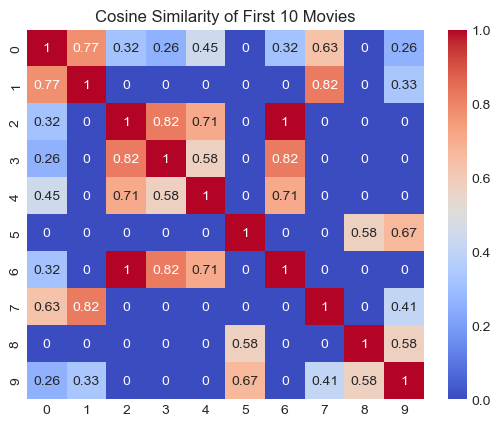

In [14]:
sns.heatmap(cosine_sim[:10, :10], annot=True, cmap='coolwarm')
plt.title("Cosine Similarity of First 10 Movies")
plt.show()

The heatmap shows similarity scores among the first 10 movies based on genres.

## Collaborative Filtering Recommender

In [15]:
pivot = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
user_similarity = cosine_similarity(pivot)
user_similarity_df = pd.DataFrame(user_similarity, index=pivot.index, columns=pivot.index)

def recommend_collaborative(user_id):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:6].index
    movies_watched = ratings[ratings['userId'] == user_id]['movieId'].tolist()
    recommendations = ratings[(ratings['userId'].isin(similar_users)) & (~ratings['movieId'].isin(movies_watched))]
    top_movies = recommendations.groupby('movieId').mean()['rating'].sort_values(ascending=False).head()
    return movies[movies['movieId'].isin(top_movies.index)][['movieId', 'title', 'genres']]

recommend_collaborative(1)

,movieId,title,genres
1730,2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War
1855,2467,"Name of the Rose, The (Name der Rose, Der) (1986)",Crime|Drama|Mystery|Thriller
2197,2921,High Plains Drifter (1973),Western
3646,5010,Black Hawk Down (2001),Action|Drama|War
3656,5026,"Brotherhood of the Wolf (Pacte des loups, Le) ...",Action|Mystery|Thriller


## User rating count distribution

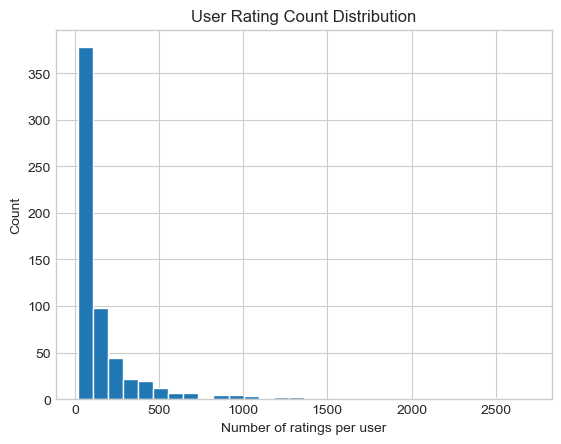

In [16]:
ratings['userId'].value_counts().hist(bins=30)
plt.xlabel("Number of ratings per user")
plt.ylabel("Count")
plt.title("User Rating Count Distribution")
plt.show()

## Movie rating count distribution

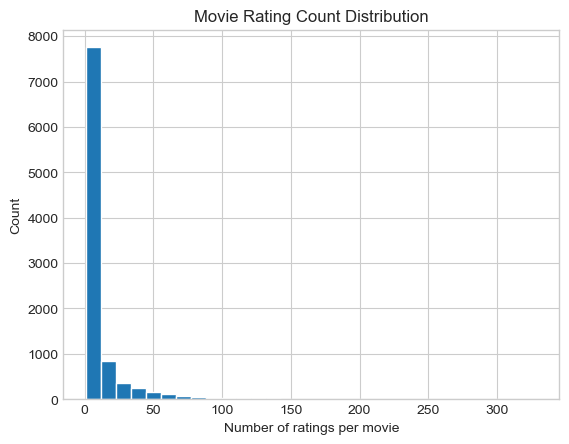

In [17]:
ratings['movieId'].value_counts().hist(bins=30)
plt.xlabel("Number of ratings per movie")
plt.ylabel("Count")
plt.title("Movie Rating Count Distribution")
plt.show()

## Average rating vs number of ratings

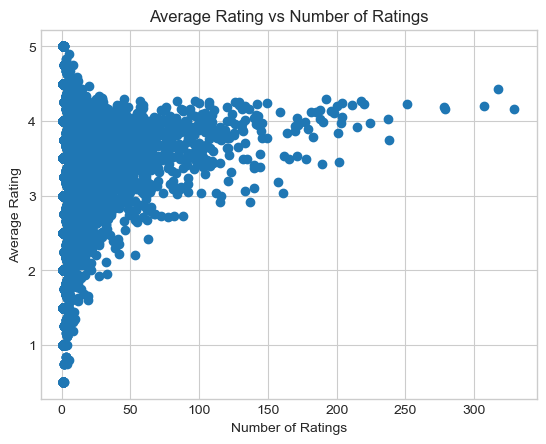

In [18]:
avg_ratings = ratings.groupby('movieId')['rating'].mean()
counts = ratings['movieId'].value_counts()
plt.scatter(counts, avg_ratings.loc[counts.index])
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.title("Average Rating vs Number of Ratings")
plt.show()